# Creating CSVs for Viz 

In [1]:
#### Import

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set_style('ticks')

import warnings

warnings.filterwarnings('ignore')

## All Data

In [2]:
cdc_data = pd.read_csv('../DATA/XXHq_2017.csv')
weighted = pd.read_csv("../DATA/weighted_2017.csv")

In [3]:
cdc_data.shape

(14765, 109)

In [4]:
cdc_data.head()

,site,raceeth,q6orig,q7orig,record,orig_rec,q1,q2,q3,q4,...,q94,q95,q96,q97,q98,q99,BMIPCT,weight,stratum,psu
0,XX,5.0,603,240,1,NaN,5.0,2.0,3.0,2.0,...,2.0,3.0,1.0,1.0,2.0,1.0,97.435947,0.5497,101,11170
1,XX,6.0,503,130,2,NaN,7.0,2.0,3.0,1.0,...,2.0,1.0,1.0,1.0,2.0,2.0,60.882561,0.3811,101,11170
2,XX,7.0,505,142,3,NaN,5.0,1.0,3.0,1.0,...,NaN,3.0,1.0,1.0,2.0,1.0,78.495112,0.4238,101,11170
3,XX,6.0,503,143,4,NaN,6.0,1.0,3.0,1.0,...,2.0,4.0,1.0,2.0,1.0,1.0,84.614440,0.4238,101,11170
4,XX,5.0,509,145,5,NaN,7.0,2.0,3.0,2.0,...,2.0,3.0,1.0,1.0,1.0,1.0,40.075252,0.5497,101,11170


In [5]:
cdc_data.drop(['q5','site','q6orig', 'q7orig', 'record', 'orig_rec' 
               ], axis = 1, inplace = True)

In [6]:
cdc_data.shape

(14765, 103)

In [7]:
cdc_data.dtypes

raceeth    float64
q1         float64
q2         float64
q3         float64
q4         float64
q6         float64
q7         float64
q8         float64
q9         float64
q10        float64
q11        float64
q12        float64
q13        float64
q14        float64
q15        float64
q16        float64
q17        float64
q18        float64
q19        float64
q20        float64
q21        float64
q22        float64
q23        float64
q24        float64
q25        float64
q26        float64
q27        float64
q28        float64
q29        float64
q30        float64
            ...   
q74        float64
q75        float64
q76        float64
q77        float64
q78        float64
q79        float64
q80        float64
q81        float64
q82        float64
q83        float64
q84        float64
q85        float64
q86        float64
q87        float64
q88        float64
q89        float64
q90        float64
q91        float64
q92        float64
q93        float64
q94        float64
q95        f

## Sexual Identity

In [8]:
cdc_data['q67'] = cdc_data['q67'].apply(lambda x: "Heterosexual" if x == 1.0 else x)
cdc_data['q67'] = cdc_data['q67'].apply(lambda x: "Gay or Lesbian" if x == 2.0 else x)
cdc_data['q67'] = cdc_data['q67'].apply(lambda x: "Bisexual" if x == 3.0 else x)                                              
cdc_data['q67'] = cdc_data['q67'].apply(lambda x: "Unsure" if x == 4.0 else x) 

cdc_data['sex_id'] = cdc_data['q67']
cdc_data['sex_id'].value_counts()

Heterosexual      12012
Bisexual           1137
Unsure              602
Gay or Lesbian      357
Name: sex_id, dtype: int64

## Age 

In [9]:
cdc_data['q1'] = cdc_data['q1'].apply(lambda x: "12 or younger" if x == 1.0 else x)
cdc_data['q1'] = cdc_data['q1'].apply(lambda x: "13 years old" if x == 2.0 else x)
cdc_data['q1'] = cdc_data['q1'].apply(lambda x: "14 years old" if x == 3.0 else x)                                              
cdc_data['q1'] = cdc_data['q1'].apply(lambda x: "15 years old" if x == 4.0 else x)  
cdc_data['q1'] = cdc_data['q1'].apply(lambda x: "16 years old" if x == 5.0 else x)
cdc_data['q1'] = cdc_data['q1'].apply(lambda x: "17 years old" if x == 6.0 else x)  
cdc_data['q1'] = cdc_data['q1'].apply(lambda x: "18 or older" if x == 7.0 else x)

cdc_data['age'] = cdc_data['q1']
cdc_data['age'].value_counts()

16 years old     3688
17 years old     3611
15 years old     3586
14 years old     1922
18 or older      1796
12 or younger      59
13 years old       22
Name: age, dtype: int64

## Grade

In [10]:
cdc_data['q3'] = cdc_data['q3'].apply(lambda x: "9th grade" if x == 1.0 else x)
cdc_data['q3'] = cdc_data['q3'].apply(lambda x: "10th grade" if x == 2.0 else x)
cdc_data['q3'] = cdc_data['q3'].apply(lambda x: "11th grade" if x == 3.0 else x)                                              
cdc_data['q3'] = cdc_data['q3'].apply(lambda x: "12th grade" if x == 4.0 else x)  
cdc_data['q3'] = cdc_data['q3'].apply(lambda x: "Ungraded or other" if x == 5.0 else x)

cdc_data['grade'] = cdc_data['q3'].astype('object')
cdc_data['grade'].value_counts()

9th grade            3921
10th grade           3715
11th grade           3602
12th grade           3383
Ungraded or other      30
Name: grade, dtype: int64

## Sex

In [11]:
cdc_data['Sex'] = cdc_data['q2'].apply(lambda x: "F" if x == 2.0 else "M")
cdc_data['Sex'].value_counts()

M    7653
F    7112
Name: Sex, dtype: int64

## Race Eth

In [12]:
cdc_data['raceeth'] = cdc_data['raceeth'].apply(lambda x: "American Indian/Alaska Native" if x == 1.0 else x)
cdc_data['raceeth'] = cdc_data['raceeth'].apply(lambda x: "Asian" if x == 2.0 else x)
cdc_data['raceeth'] = cdc_data['raceeth'].apply(lambda x: "African American" if x == 3.0 else x)
cdc_data['raceeth'] = cdc_data['raceeth'].apply(lambda x: "Native Hawaiian/Other Pacific Isld" if x == 4.0 else x)                                              
cdc_data['raceeth'] = cdc_data['raceeth'].apply(lambda x: "White" if x == 5.0 else x)                                             
cdc_data['raceeth'] = cdc_data['raceeth'].apply(lambda x: "Hispanic/Latino" if x == 6.0 else x)
cdc_data['raceeth'] = cdc_data['raceeth'].apply(lambda x: "Multiple Hispanic/Latino" if x == 7.0 else x)
cdc_data['raceeth'] = cdc_data['raceeth'].apply(lambda x: "Multiple non-Hispanic/Latino" if x == 8.0 else x)

cdc_data['raceeth'].value_counts()

White                                 6261
African American                      2796
Multiple Hispanic/Latino              2104
Hispanic/Latino                       1543
Multiple non-Hispanic/Latino           823
Asian                                  648
American Indian/Alaska Native          137
Native Hawaiian/Other Pacific Isld     116
Name: raceeth, dtype: int64

In [13]:
cdc_data.head()

,raceeth,q1,q2,q3,q4,q6,q7,q8,q9,q10,...,q98,q99,BMIPCT,weight,stratum,psu,sex_id,age,grade,Sex
0,White,16 years old,2.0,11th grade,2.0,1.90,108.86,4.0,1.0,2.0,...,2.0,1.0,97.435947,0.5497,101,11170,Heterosexual,16 years old,11th grade,F
1,Hispanic/Latino,18 or older,2.0,11th grade,1.0,1.60,58.97,5.0,1.0,2.0,...,2.0,2.0,60.882561,0.3811,101,11170,Heterosexual,18 or older,11th grade,F
2,Multiple Hispanic/Latino,16 years old,1.0,11th grade,1.0,1.65,64.41,5.0,1.0,2.0,...,2.0,1.0,78.495112,0.4238,101,11170,Heterosexual,16 years old,11th grade,M
3,Hispanic/Latino,17 years old,1.0,11th grade,1.0,1.60,64.86,4.0,1.0,2.0,...,1.0,1.0,84.614440,0.4238,101,11170,Heterosexual,17 years old,11th grade,M
4,White,18 or older,2.0,11th grade,2.0,1.75,65.77,5.0,1.0,2.0,...,1.0,1.0,40.075252,0.5497,101,11170,Heterosexual,18 or older,11th grade,F


In [14]:
cdc_data.drop(['q1', 'q3', 'q67'], axis =1, inplace = True)

## Groups

In [398]:
Demo13 = pd.DataFrame(cdc_data[['raceeth', 'sex_id', 'age', 'grade', 'Sex', 'q13']])

In [401]:
q13_age = Demo13.groupby(['q13', 'age']).agg('count')
q13_age

raceeth  sex_id  grade   Sex
q13 age                                        
1.0 12 or younger       25      22     25    26
    13 years old        17      17     18    18
    14 years old      1804    1737   1840  1845
    15 years old      3370    3251   3424  3434
    16 years old      3420    3355   3471  3480
    17 years old      3331    3244   3357  3364
    18 or older       1646    1613   1665  1668
2.0 12 or younger        7       8      7     8
    13 years old         1       2      3     3
    14 years old        23      23     24    24
    15 years old        38      33     39    39
    16 years old        37      36     37    39
    17 years old        46      44     45    46
    18 or older         10      11     11    11
3.0 12 or younger        3       5      5     5
    13 years old         0       1      1     1
    14 years old        11       9     12    12
    15 years old        15      14     15    15
    16 years old        28      32     31    32
    17 years old        32      31     33    34
    18 or older         18      18     18    18
4.0 12 or younger        1       2      2     2
    14 years old         6       6      6     6
    15 years old         2       2      2     2
    16 years old         8       8      7     8
    17 years old        12      13     13    13
    18 or older         11      10     12    12
5.0 12 or younger       13      11     14    14
    14 years old        19      17     20    20
    15 years old        31      28     31    32
    16 years old        62      59     62    63
    17 years old        92      89     94    94
    18 or older         42      42     42    44

In [403]:
q13_raceeth = Demo13.groupby(['q13', 'raceeth']).agg('count')
q13_raceeth

sex_id   age  grade   Sex
q13 raceeth                                                      
1.0 African American                      2511  2648   2647  2650
    American Indian/Alaska Native          111   121    121   121
    Asian                                  588   600    598   600
    Hispanic/Latino                       1399  1440   1438  1442
    Multiple Hispanic/Latino              1913  1959   1953  1962
    Multiple non-Hispanic/Latino           755   780    777   780
    Native Hawaiian/Other Pacific Isld      96   104    104   104
    White                                 5679  5961   5958  5965
2.0 African American                        30    36     35    36
    American Indian/Alaska Native            6     6      6     6
    Asian                                    3     3      3     3
    Hispanic/Latino                         12    13     13    13
    Multiple Hispanic/Latino                15    19     19    19
    Multiple non-Hispanic/Latino            11    11     11    11
    Native Hawaiian/Other Pacific Isld       2     2      2     2
    White                                   70    72     71    72
3.0 African American                        30    31     31    31
    American Indian/Alaska Native            3     3      3     3
    Asian                                    2     2      2     2
    Hispanic/Latino                          9     9      9     9
    Multiple Hispanic/Latino                10    13     13    13
    Multiple non-Hispanic/Latino             7     7      7     7
    Native Hawaiian/Other Pacific Isld       0     1      1     1
    White                                   39    41     40    41
4.0 African American                        10    10     10    10
    Asian                                    1     1      1     1
    Hispanic/Latino                          4     5      5     5
    Multiple Hispanic/Latino                 7     7      6     7
    Multiple non-Hispanic/Latino             3     3      3     3
    Native Hawaiian/Other Pacific Isld       2     2      2     2
    White                                   11    12     12    12
5.0 African American                        28    33     32    33
    American Indian/Alaska Native            3     3      3     3
    Asian                                    4     5      5     5
    Hispanic/Latino                         12    12     12    12
    Multiple Hispanic/Latino                55    60     60    60
    Multiple non-Hispanic/Latino            15    16     16    16
    Native Hawaiian/Other Pacific Isld       3     3      3     3
    White                                  120   127    127   128

In [405]:
q13_sex_id = Demo13.groupby(['q13', 'sex_id']).agg('count')
q13_sex_id

raceeth    age  grade    Sex
q13 sex_id                                      
1.0 Bisexual           1021   1033   1032   1040
    Gay or Lesbian      296    304    303    305
    Heterosexual      11203  11356  11339  11410
    Unsure              532    546    545    549
2.0 Bisexual             15     16     16     16
    Gay or Lesbian       14     15     15     15
    Heterosexual        109    114    110    114
    Unsure               11     12     12     12
3.0 Bisexual             14     17     17     18
    Gay or Lesbian        9     10     10     10
    Heterosexual         71     76     75     77
    Unsure                6      7      7      7
4.0 Bisexual              5      6      6      6
    Gay or Lesbian        5      6      5      6
    Heterosexual         27     28     28     28
    Unsure                1      1      1      1
5.0 Bisexual             25     25     25     25
    Gay or Lesbian        6      7      7      8
    Heterosexual        195    199    197    201
    Unsure               14     15     14     16

In [407]:
q13_grade = Demo13.groupby(['q13', 'grade']).agg('count')
q13_grade 

raceeth  sex_id   age   Sex
q13 grade                                         
1.0 10th grade            3436    3359  3504  3508
    11th grade            3341    3284  3387  3387
    12th grade            3122    3031  3142  3147
    9th grade             3684    3535  3754  3757
    Ungraded or other       13      10    13    13
2.0 10th grade              40      38    42    42
    11th grade              40      39    41    41
    12th grade              26      26    26    26
    9th grade               53      49    56    56
    Ungraded or other        1       1     1     1
3.0 10th grade              25      25    26    26
    11th grade              37      38    39    39
    12th grade              29      30    32    32
    9th grade               15      14    17    17
    Ungraded or other        0       2     1     2
4.0 10th grade               1       1     1     1
    11th grade               9       9    10    10
    12th grade              21      22    23    23
    9th grade                8       8     8     8
5.0 10th grade              45      42    46    46
    11th grade              78      77    81    83
    12th grade              83      80    83    83
    9th grade               40      33    41    41
    Ungraded or other       12      11    12    12

In [409]:
q13_sex = Demo13.groupby(['q13', 'Sex']).agg('count')
q13_sex

raceeth  sex_id   age  grade
q13 Sex                              
1.0 F       6448    6274  6556   6541
    M       7176    7030  7279   7271
2.0 F        113     109   118    116
    M         49      48    52     50
3.0 F         71      73    77     75
    M         36      39    40     41
4.0 F         30      30    32     31
    M         10      11    11     11
5.0 F        193     178   195    196
    M         67      72    72     69

## Demo Viz

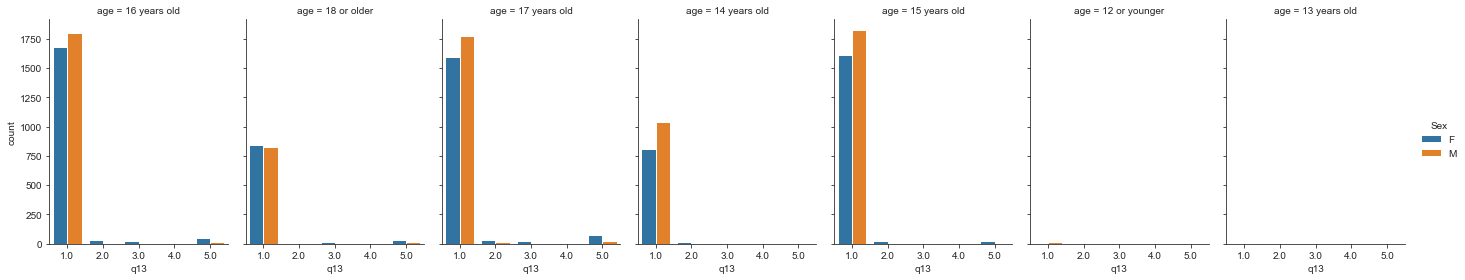

In [418]:
### AGE
sns.catplot(x="q13", hue="Sex", col="age",
            data=cdc_data, kind="count",
            height=4, aspect=.7)

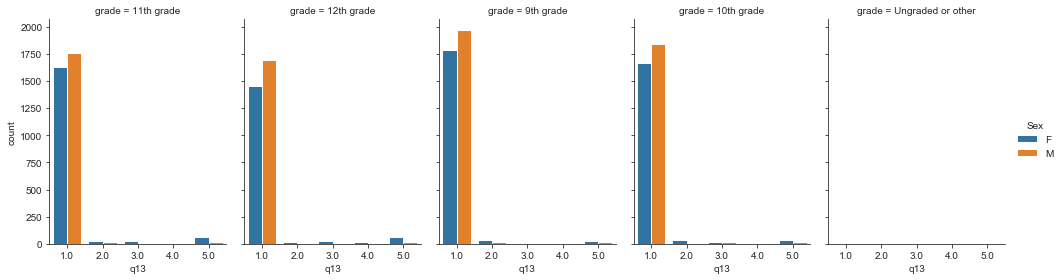

In [419]:
## Grade
sns.catplot(x="q13", hue="Sex", col="grade",
...                 data=cdc_data, kind="count",
...                 height=4, aspect=.7);

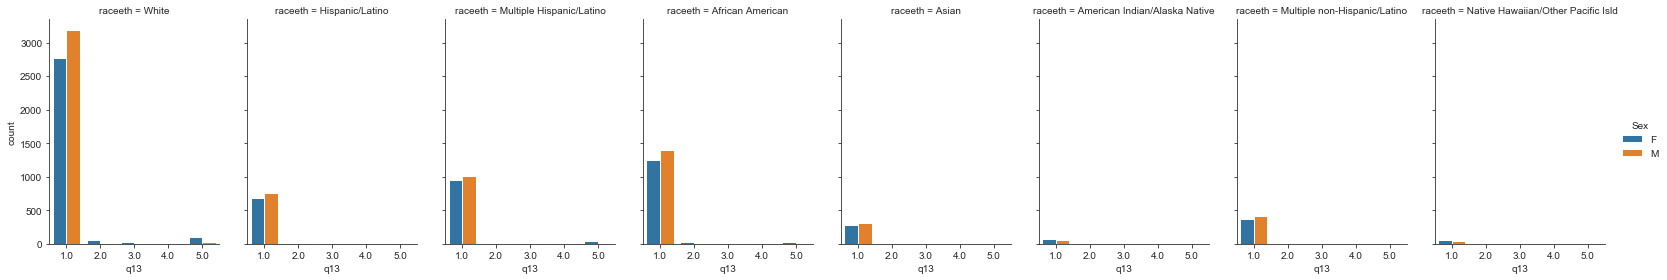

In [420]:
## Race
sns.catplot(x="q13", hue="Sex", col="raceeth",
...                 data=cdc_data, kind="count",
...                 height=4, aspect=.7);

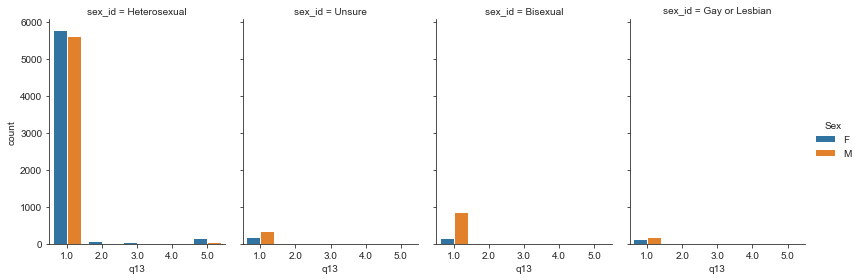

In [421]:
sns.catplot(x="q13", hue="Sex", col="sex_id",
...                 data=cdc_data, kind="count",
...                 height=4, aspect=.7);

# Missing

In [5]:
total = cdc_data.isna().sum()/cdc_data.isna().count()
sum=cdc_data.isna().sum()

missing=pd.concat([total,sum],axis=1,keys=['Perc','Sum']).sort_values(by='Perc',ascending=False)

colstodrop = missing[missing['Sum']>0].index

missing[missing['Sum']>0]

,Perc,Sum
orig_rec,1.000000,14765
q45,0.314121,4638
q39,0.302201,4462
q43,0.296309,4375
q29,0.280731,4145
q98,0.277481,4097
q28,0.276261,4079
q93,0.275449,4067
q94,0.275042,4061
q97,0.274704,4056


In [16]:
for column in cdc_data.columns:
    cdc_data[column].fillna(cdc_data[column].mode()[0], inplace=True)

In [17]:
cdc_data.isna().sum()

raceeth    0
q2         0
q4         0
q6         0
q7         0
q8         0
q9         0
q10        0
q11        0
q12        0
q13        0
q14        0
q15        0
q16        0
q17        0
q18        0
q19        0
q20        0
q21        0
q22        0
q23        0
q24        0
q25        0
q26        0
q27        0
q28        0
q29        0
q30        0
q31        0
q32        0
          ..
q78        0
q79        0
q80        0
q81        0
q82        0
q83        0
q84        0
q85        0
q86        0
q87        0
q88        0
q89        0
q90        0
q91        0
q92        0
q93        0
q94        0
q95        0
q96        0
q97        0
q98        0
q99        0
BMIPCT     0
weight     0
stratum    0
psu        0
sex_id     0
age        0
grade      0
Sex        0
Length: 104, dtype: int64

In [18]:
cdc_data.to_csv('cdc_data_noNA.csv')

# Modeling

In [316]:
import sklearn.feature_selection as fs

In [317]:
from sklearn import linear_model
from sklearn.linear_model import ElasticNet, Lasso, Ridge, SGDRegressor
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import  train_test_split
from sklearn.metrics import mean_squared_error, log_loss
from sklearn.decomposition import PCA



import sklearn.model_selection as ms

from sklearn import ensemble
from sklearn.ensemble import RandomForestRegressor
from pprint import pprint
from sklearn.svm import SVR

In [340]:
ridge = linear_model.Ridge(alpha = 1, normalize=True, copy_X= True, fit_intercept = False)
lasso = linear_model.Lasso(alpha= 0, normalize = False)
elasticnet = linear_model.ElasticNet(alpha = 1, l1_ratio=0.5, normalize=False)
clf = linear_model.SGDRegressor(max_iter=1000, tol=1e-3)

gbm = ensemble.GradientBoostingRegressor()
rf = ensemble.RandomForestRegressor(n_estimators = 500, min_samples_split=2,
                                    min_samples_leaf = 1, max_features = 'sqrt',
                                    max_depth = None, bootstrap = False, random_state=42)


In [341]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y, test_size = 0.30, random_state = 42)

In [342]:
modelList =[ridge, lasso, elasticnet, clf, gbm, rf]
modelSeries= pd.Series(modelList, index =[ 'Ridge', 'Lasso', 'Elasticnet', 'SGD', 'XGboost', 'Random Forest'])

In [343]:
modelSeries.apply(lambda x:x.fit(X_train, y_train))

/Users/lauraelliott/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  """Entry point for launching an IPython kernel.
/Users/lauraelliott/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/Users/lauraelliott/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lauraelliott/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for examp

Ridge            Ridge(alpha=1, copy_X=True, fit_intercept=Fals...
Lasso            Lasso(alpha=0, copy_X=True, fit_intercept=True...
Elasticnet       ElasticNet(alpha=1, copy_X=True, fit_intercept...
SGD              SGDRegressor(alpha=0.0001, average=False, earl...
XGboost          ([DecisionTreeRegressor(criterion='friedman_ms...
Random Forest    (DecisionTreeRegressor(criterion='mse', max_de...
dtype: object

In [344]:
ans = pd.concat([modelSeries.apply(lambda x: x.score(X_train,y_train)),modelSeries.apply(lambda x: x.score(X_test,y_test)), 
                                    modelSeries.apply(lambda x: np.sqrt(mean_squared_error(x.predict(X_test), y_test)))],axis=1)

ans.columns = ['train score', 'test score', 'rmse']
ans

,train score,test score,rmse
Ridge,3.591563e-01,2.532234e-01,5.112327e-01
Lasso,3.635942e-01,2.422583e-01,5.149723e-01
Elasticnet,0.000000e+00,-2.713038e-05,5.916014e-01
SGD,-4.028189e+20,-4.070988e+20,1.193640e+10
XGboost,4.643399e-01,3.108851e-01,4.910991e-01
Random Forest,1.000000e+00,2.874172e-01,4.993913e-01


In [155]:
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors=3) 
knn.fit(X_train, y_train) 

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [151]:
gbm._params_

AttributeError: 'GradientBoostingRegressor' object has no attribute '_params_'

In [148]:
gbm.fit(X_train, y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

### Imputation

In [127]:
cdc_data.q43.value_counts()

1.0    7317
6.0    1324
5.0     582
8.0     571
7.0     388
2.0     143
3.0      41
4.0      24
Name: q43, dtype: int64

In [128]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer( strategy='most_frequent')
imp_mean.fit(cdc_data)
imputed_train_df = imp_mean.transform(cdc_data)

In [111]:
impute_mode = cdc_data.loc[:,:]

for i in impute_mode.columns:
    cdc_data[i].fillna(cdc_data[i].mode(), inplace =True)

In [129]:
cdc_data.isna().sum()

raceeth     337
q1           81
q2          127
q3          114
q4          255
q6         1619
q7         1619
q8         2891
q9           50
q10        1070
q11         963
q12        3027
q14         570
q15        2594
q16          63
q17        2708
q18         287
q19         325
q20         620
q21         993
q22         680
q23         159
q24         170
q25         238
q26         212
q27         224
q28        4079
q29        4145
q30        2853
q31        2851
           ... 
q72         740
q73         738
q74         776
q75         830
q76         461
q77        2905
q78        2847
q79         527
q80         898
q81         926
q82         614
q83        3045
q84         628
q85         624
q86         564
q87         940
q88        2954
q89        3091
q90        3510
q91        3891
q92        3877
q93        4067
q94        4061
q95        4052
q96        1751
q97        4056
q98        4097
q99        4054
BMIPCT     1619
weight        0
Length: 100, dtype: int6

In [130]:
y = cdc_data['q13']


KeyError: 'q13'

## Feature Selection Test

In [116]:
from scipy.stats import chisquare
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import chi2_contingency

class ChiSquare:
    def __init__(self, cdc_data):
        self.df = cdc_data
        self.p = None #P-Value
        self.chi2 = None #Chi Test Statistic
        self.dof = None
        
        self.dfObserved = None
        self.dfExpected = None
        
    def _print_chisquare_result(self, colX, alpha):
        result = ""
        if self.p<alpha:
            result="{0} is IMPORTANT for Prediction".format(colX)
        else:
            result="{0} is NOT an important predictor. (Discard {0} from model)".format(colX)

        print(result)
        
    def TestIndependence(self,colX,colY, alpha=0.05):
        X = self.df[colX].astype(str)
        Y = self.df[colY].astype(str)
        
        self.dfObserved = pd.crosstab(Y,X) 
        chi2, p, dof, expected = stats.chi2_contingency(self.dfObserved.values)
        self.p = p
        self.chi2 = chi2
        self.dof = dof 
        
        self.dfExpected = pd.DataFrame(expected, columns=self.dfObserved.columns, index = self.dfObserved.index)
        
        self._print_chisquare_result(colX,alpha)




In [123]:
#Demographic Features
cT = ChiSquare(cdc_data)

#Feature Selection
testColumns = ['q1', 'q2', 'q3', 'q4', 'q5']
for var in testColumns:
    cT.TestIndependence(colX=var,colY="q13" ) 

q1 is IMPORTANT for Prediction
q2 is IMPORTANT for Prediction
q3 is IMPORTANT for Prediction
q4 is IMPORTANT for Prediction
q5 is IMPORTANT for Prediction


In [124]:
#Alcohol
testColumns = ['q8', 'q9', 'q10', 'q11']
for var in testColumns:
    cT.TestIndependence(colX=var,colY="q13" ) 

q8 is IMPORTANT for Prediction
q9 is IMPORTANT for Prediction
q10 is IMPORTANT for Prediction
q11 is IMPORTANT for Prediction


In [127]:
#Other violence, bullying
testColumns = ['q12', 'q14', 'q15', 'q16', 'q17', 'q18',
               'q19', 'q20', 'q21','q22', 'q23', 'q24', 'q25' ]
for var in testColumns:
    cT.TestIndependence(colX=var,colY="q13" ) 

q12 is IMPORTANT for Prediction
q14 is IMPORTANT for Prediction
q15 is IMPORTANT for Prediction
q16 is IMPORTANT for Prediction
q17 is IMPORTANT for Prediction
q18 is IMPORTANT for Prediction
q19 is IMPORTANT for Prediction
q20 is IMPORTANT for Prediction
q21 is IMPORTANT for Prediction
q22 is IMPORTANT for Prediction
q23 is IMPORTANT for Prediction
q24 is IMPORTANT for Prediction
q25 is IMPORTANT for Prediction


In [128]:
# Suicide 
testColumns = ['q26', 'q27', 'q28', 'q29' ]
for var in testColumns:
    cT.TestIndependence(colX=var,colY="q13" ) 

q26 is IMPORTANT for Prediction
q27 is IMPORTANT for Prediction
q28 is IMPORTANT for Prediction
q29 is IMPORTANT for Prediction


In [336]:
cdc_data.head()

,site,raceeth,q6orig,q7orig,record,orig_rec,q4,q5,q6,q8,...,weight,stratum,psu,suicide_consider,age,grade,Sex,wght,Gun_carry,oth_weapons
0,XX,White,603,240,1,NaN,2.0,E,1.90,4.0,...,0.5497,101,11170,No,16 years old,11th grade,F,108.86,1,1
1,XX,Hispanic/Latino,503,130,2,NaN,1.0,NaN,1.60,5.0,...,0.3811,101,11170,No,18 or older,11th grade,F,58.97,1,1
2,XX,Multiple Hispanic/Latino,505,142,3,NaN,1.0,A,1.65,5.0,...,0.4238,101,11170,No,16 years old,11th grade,M,64.41,1,1
3,XX,Hispanic/Latino,503,143,4,NaN,1.0,NaN,1.60,4.0,...,0.4238,101,11170,No,17 years old,11th grade,M,64.86,1,1
4,XX,White,509,145,5,NaN,2.0,E,1.75,5.0,...,0.5497,101,11170,No,18 or older,11th grade,F,65.77,1,1


In [187]:
weighted.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,QN8,QN9,QN10,...,BMIPCT,RACEETH,Q6ORIG,Q7ORIG,QNDAYEVP,QNFREVP,QNDAYSKL,QNFRSKL,QNDAYCGR,QNFRCGR
0,5.0,2.0,3.0,2.0,E,1.90,108.86,2.0,2.0,2.0,...,97.44,5.0,603,240,2.0,2.0,2.0,2.0,2.0,2.0
1,7.0,2.0,3.0,1.0,NaN,1.60,58.97,2.0,2.0,2.0,...,60.88,6.0,503,130,2.0,2.0,2.0,2.0,2.0,2.0
2,5.0,1.0,3.0,1.0,A,1.65,64.41,2.0,2.0,2.0,...,78.50,7.0,505,142,2.0,2.0,2.0,2.0,2.0,2.0
3,6.0,1.0,3.0,1.0,NaN,1.60,64.86,2.0,2.0,2.0,...,84.61,6.0,503,143,2.0,2.0,2.0,2.0,2.0,2.0
4,7.0,2.0,3.0,2.0,E,1.75,65.77,2.0,2.0,2.0,...,40.08,5.0,509,145,2.0,2.0,2.0,2.0,2.0,2.0


In [188]:
cdc_data.columns


Index(['site', 'raceeth', 'q6orig', 'q7orig', 'record', 'orig_rec', 'q1', 'q2',
       'q3', 'q4',
       ...
       'q94', 'q95', 'q96', 'q97', 'q98', 'q99', 'BMIPCT', 'weight', 'stratum',
       'psu'],
      dtype='object', length=109)

In [189]:
cdc_data['q13'].astype('object')
cdc_data['q13'].value_counts()

1.0    13903
5.0      272
2.0      170
3.0      119
4.0       43
Name: q13, dtype: int64

In [190]:
cdc_data['q14'].astype('object')
cdc_data['q14'].value_counts()

1.0    13467
5.0      289
2.0      196
3.0      174
4.0       69
Name: q14, dtype: int64

In [191]:
cdc_data['q2'].value_counts()

1.0    7526
2.0    7112
Name: q2, dtype: int64

In [192]:
cdc_data['raceeth'].value_counts()

5.0    6261
3.0    2796
7.0    2104
6.0    1543
8.0     823
2.0     648
1.0     137
4.0     116
Name: raceeth, dtype: int64

In [193]:
cdc_data['q3'].value_counts()

1.0    3921
2.0    3715
3.0    3602
4.0    3383
5.0      30
Name: q3, dtype: int64

In [194]:
cdc_data['q1'].value_counts()

5.0    3688
6.0    3611
4.0    3586
3.0    1922
7.0    1796
1.0      59
2.0      22
Name: q1, dtype: int64

In [195]:
cdc_data['q26'].value_counts()

2.0    11982
1.0     2571
Name: q26, dtype: int64

### Sexual Identity

In [406]:
cdc_data['q67'].value_counts()

1.0    12012
3.0     1137
4.0      602
2.0      357
Name: q67, dtype: int64

In [4]:
cdc_data['q67'] = cdc_data['q67'].apply(lambda x: "Heterosexual" if x == 1.0 else x)
cdc_data['q67'] = cdc_data['q67'].apply(lambda x: "Gay or Lesbian" if x == 2.0 else x)
cdc_data['q67'] = cdc_data['q67'].apply(lambda x: "Bisexual" if x == 3.0 else x)                                              
cdc_data['q67'] = cdc_data['q67'].apply(lambda x: "Unsure" if x == 4.0 else x) 

cdc_data['sex_id'] = cdc_data['q67']
cdc_data['sex_id'].value_counts()


Heterosexual      12012
Bisexual           1137
Unsure              602
Gay or Lesbian      357
Name: sex_id, dtype: int64

### NW Suicide attempts last 12 mo to names

In [5]:
cdc_data['suicide_consider'] = cdc_data['q26'].apply(lambda x: "Yes" if x == 1.0 else "No")

#cdc_data['suicide_consider'] = cdc_data['q26']
cdc_data['suicide_consider'].value_counts()

No     12194
Yes     2571
Name: suicide_consider, dtype: int64

### Age to names

In [6]:
cdc_data['q1'] = cdc_data['q1'].apply(lambda x: "12 or younger" if x == 1.0 else x)
cdc_data['q1'] = cdc_data['q1'].apply(lambda x: "13 years old" if x == 2.0 else x)
cdc_data['q1'] = cdc_data['q1'].apply(lambda x: "14 years old" if x == 3.0 else x)                                              
cdc_data['q1'] = cdc_data['q1'].apply(lambda x: "15 years old" if x == 4.0 else x)  
cdc_data['q1'] = cdc_data['q1'].apply(lambda x: "16 years old" if x == 5.0 else x)
cdc_data['q1'] = cdc_data['q1'].apply(lambda x: "17 years old" if x == 6.0 else x)  
cdc_data['q1'] = cdc_data['q1'].apply(lambda x: "18 or older" if x == 7.0 else x)

cdc_data['age'] = cdc_data['q1']
cdc_data['age'].value_counts()

16 years old     3688
17 years old     3611
15 years old     3586
14 years old     1922
18 or older      1796
12 or younger      59
13 years old       22
Name: age, dtype: int64

### Grade values to names

In [7]:
cdc_data['q3'] = cdc_data['q3'].apply(lambda x: "9th grade" if x == 1.0 else x)
cdc_data['q3'] = cdc_data['q3'].apply(lambda x: "10th grade" if x == 2.0 else x)
cdc_data['q3'] = cdc_data['q3'].apply(lambda x: "11th grade" if x == 3.0 else x)                                              
cdc_data['q3'] = cdc_data['q3'].apply(lambda x: "12th grade" if x == 4.0 else x)  
cdc_data['q3'] = cdc_data['q3'].apply(lambda x: "Ungraded or other" if x == 5.0 else x)

cdc_data['grade'] = cdc_data['q3'].astype('object')
cdc_data['grade'].value_counts()


9th grade            3921
10th grade           3715
11th grade           3602
12th grade           3383
Ungraded or other      30
Name: grade, dtype: int64

### Sex to M/F

In [8]:
cdc_data['Sex'] = cdc_data['q2'].apply(lambda x: "F" if x == 2.0 else "M")
cdc_data['Sex'].value_counts()

M    7653
F    7112
Name: Sex, dtype: int64

### Race/Eth to Names

In [9]:
cdc_data['raceeth'] = cdc_data['raceeth'].apply(lambda x: "American Indian/Alaska Native" if x == 1.0 else x)
cdc_data['raceeth'] = cdc_data['raceeth'].apply(lambda x: "Asian" if x == 2.0 else x)
cdc_data['raceeth'] = cdc_data['raceeth'].apply(lambda x: "African American" if x == 3.0 else x)
cdc_data['raceeth'] = cdc_data['raceeth'].apply(lambda x: "Native Hawaiian/Other Pacific Isld" if x == 4.0 else x)                                              
cdc_data['raceeth'] = cdc_data['raceeth'].apply(lambda x: "White" if x == 5.0 else x)                                             
cdc_data['raceeth'] = cdc_data['raceeth'].apply(lambda x: "Hispanic/Latino" if x == 6.0 else x)
cdc_data['raceeth'] = cdc_data['raceeth'].apply(lambda x: "Multiple Hispanic/Latino" if x == 7.0 else x)
cdc_data['raceeth'] = cdc_data['raceeth'].apply(lambda x: "Multiple non-Hispanic/Latino" if x == 8.0 else x)

cdc_data['raceeth'].value_counts()


White                                 6261
African American                      2796
Multiple Hispanic/Latino              2104
Hispanic/Latino                       1543
Multiple non-Hispanic/Latino           823
Asian                                  648
American Indian/Alaska Native          137
Native Hawaiian/Other Pacific Isld     116
Name: raceeth, dtype: int64

### Weight

In [10]:
cdc_data['q7'].describe()

cdc_data['wght'] = cdc_data['q7']
cdc_data['wght'].describe()

count    13146.000000
mean        67.687421
std         17.456387
min         24.950000
25%         55.340000
50%         63.500000
75%         75.300000
max        180.990000
Name: wght, dtype: float64

In [11]:
cdc_data.drop(['q26', 'q1', 'q3', 'q2', 'q7', 'q67'], axis=1, inplace=True)


In [429]:
cdc_data.head()

,site,raceeth,q6orig,q7orig,record,orig_rec,q1,q2,q3,q4,...,BMIPCT,weight,stratum,psu,sex_id,suicide_consider,age,grade,Sex,wght
0,XX,White,603,240,1,NaN,16 years old,2.0,11th grade,2.0,...,97.435947,0.5497,101,11170,Heterosexual,No,16 years old,11th grade,F,108.86
1,XX,Hispanic/Latino,503,130,2,NaN,18 or older,2.0,11th grade,1.0,...,60.882561,0.3811,101,11170,Heterosexual,No,18 or older,11th grade,F,58.97
2,XX,Multiple Hispanic/Latino,505,142,3,NaN,16 years old,1.0,11th grade,1.0,...,78.495112,0.4238,101,11170,Heterosexual,No,16 years old,11th grade,M,64.41
3,XX,Hispanic/Latino,503,143,4,NaN,17 years old,1.0,11th grade,1.0,...,84.614440,0.4238,101,11170,Heterosexual,No,17 years old,11th grade,M,64.86
4,XX,White,509,145,5,NaN,18 or older,2.0,11th grade,2.0,...,40.075252,0.5497,101,11170,Heterosexual,No,18 or older,11th grade,F,65.77


## Making Weighted Values

# Q13,Q14: Weapon carry and Demographics

Question 13:
During the past 30 days, on how many days did you carry a weapon such as a gun, knife, or club on school property? 

* 1.0 = 0 days 
* 2.0 = 1 day 
* 3.0 = 2 or 3 days
* 4.0 = 4 or 5 days 
* 5.0 = 6 or more days



Question 14:
"During the past 12 months, on how many days did you carry a gun? (Do not count the days when you carried a gun only for hunting or for a sport, such as target shooting.)"

* 1.0 = 0 days (dropped just for viz purposes)
* 2.0 = 1 day 
* 3.0 = 2 or 3 days
* 4.0 = 4 or 5 days 
* 5.0 = 6 or more days

In [12]:
### making new DF for gun carry and demographic variables with weights

cdc_data['Gun_carry'] = cdc_data["q14"].astype('object')
cdc_data['oth_weapons'] = cdc_data["q13"].astype('object')

cdc_data.drop(['q14', 'q13'], axis=1, inplace=True)

## DF
Demo = pd.DataFrame(cdc_data[['Sex', 'raceeth', 'age', 'grade', 'suicide_consider', 'wght', 'weight', 'sex_id']])
weapon_carry = pd.DataFrame(cdc_data[['Gun_carry', 'oth_weapons', 'weight']])

In [13]:
weapon_carry = pd.merge(weapon_carry, Demo, how='outer', on='weight')

In [14]:
weapon_carry.head()

,Gun_carry,oth_weapons,weight,Sex,raceeth,age,grade,suicide_consider,wght,sex_id
0,1,1,0.5497,F,White,16 years old,11th grade,No,108.86,Heterosexual
1,1,1,0.5497,F,White,18 or older,11th grade,No,65.77,Heterosexual
2,1,1,0.5497,F,White,16 years old,11th grade,Yes,68.04,Heterosexual
3,1,1,0.5497,F,White,16 years old,11th grade,No,NaN,Heterosexual
4,1,1,0.5497,F,White,16 years old,11th grade,No,117.94,Heterosexual


## Missing Gun Carry

In [15]:
################################################################################


total = weapon_carry.isna().sum()/weapon_carry.isna().count()
sum=weapon_carry.isna().sum()

missing=pd.concat([total,sum],axis=1,keys=['Perc','Sum']).sort_values(by='Perc',ascending=False)

colstodrop = missing[missing['Sum']>0].index

missing[missing['Sum']>0]

,Perc,Sum
wght,0.093809,21472
sex_id,0.047110,10783
Gun_carry,0.026436,6051
raceeth,0.025977,5946
oth_weapons,0.015483,3544
grade,0.007257,1661
age,0.004854,1111


## Impute

#### Demographics

In [43]:
##### DEMOGraphic SET

Demo.isna().sum()

Sex                    0
raceeth              337
age                   81
grade                114
suicide_consider       0
wght                1619
weight                 0
sex_id               657
dtype: int64

In [48]:
Demo['raceeth']=Demo['raceeth'].fillna('White')
print('Raceeth unique Values: ', Demo['raceeth'].unique())

Demo['age']=Demo['age'].fillna('16 years old')
print('Age unique Values: ', Demo['age'].unique())

Demo['grade']=Demo['grade'].fillna('9th grade')
print('Grade unique Values: ', Demo['grade'].unique())

Demo['wght'] = Demo['wght'].apply(lambda x: np.random.choice(Demo['wght'].dropna().values) if np.isnan(x) else x)
print('Wght missing:', Demo['wght'].isna().sum())

Demo['sex_id']=Demo['sex_id'].fillna('Heterosexual')
print('Sex id unique Values: ', Demo['sex_id'].unique())

Raceeth unique Values:  ['White' 'Hispanic/Latino' 'Multiple Hispanic/Latino' 'African American'
 'Asian' 'American Indian/Alaska Native' 'Multiple non-Hispanic/Latino'
 'Native Hawaiian/Other Pacific Isld']
Age unique Values:  ['16 years old' '18 or older' '17 years old' '14 years old' '15 years old'
 '12 or younger' '13 years old']
Grade unique Values:  ['11th grade' '12th grade' '9th grade' '10th grade' 'Ungraded or other']
Wght missing: 0
Sex id unique Values:  ['Heterosexual' 'Unsure' 'Bisexual' 'Gay or Lesbian']


#### Weapon Carry

In [21]:
#### wght with random 

weapon_carry['wght'] = weapon_carry['wght'].apply(lambda x: np.random.choice(weapon_carry['wght'].dropna().values) if np.isnan(x) else x)
#.fillna(housing_merge['LotFrontage'].mean(), inplace=True)
print('Wght missing:', weapon_carry['wght'].isna().sum())

weapon_carry.oth_weapons.value_counts()


Wght missing: 0


1.0    215018
5.0      4087
2.0      3544
3.0      1910
4.0       788
Name: oth_weapons, dtype: int64

In [23]:
#### oth_weapon, Gun_carry, raceeth, grade, age with mode
weapon_carry['oth_weapons']=weapon_carry['oth_weapons'].fillna(1.0)
print('Oth_weapons unique Values: ', weapon_carry['oth_weapons'].unique())

weapon_carry['Gun_carry']=weapon_carry['Gun_carry'].fillna(1.0)
print('Gun_carry unique Values: ', weapon_carry['Gun_carry'].unique())

weapon_carry['raceeth']=weapon_carry['raceeth'].fillna('White')
print('Raceeth unique Values: ', weapon_carry['raceeth'].unique())

weapon_carry['age']=weapon_carry['age'].fillna('16 years old')
print('Age unique Values: ', weapon_carry['age'].unique())

weapon_carry['grade']=weapon_carry['grade'].fillna('9th grade')
print('Grade unique Values: ', weapon_carry['grade'].unique())

weapon_carry['sex_id']=weapon_carry['sex_id'].fillna('Heterosexual')
print('Sex id unique Values: ', weapon_carry['sex_id'].unique())

Oth_weapons unique Values:  [1. 5. 3. 4. 2.]
Gun_carry unique Values:  [1. 3. 5. 4. 2.]
Raceeth unique Values:  ['White' 'Hispanic/Latino' 'Multiple Hispanic/Latino' 'African American'
 'Asian' 'Multiple non-Hispanic/Latino' 'American Indian/Alaska Native'
 'Native Hawaiian/Other Pacific Isld']
Age unique Values:  ['16 years old' '18 or older' '17 years old' '14 years old' '15 years old'
 '12 or younger' '13 years old']
Grade unique Values:  ['11th grade' '12th grade' '9th grade' '10th grade' 'Ungraded or other']
Sex id unique Values:  ['Heterosexual' 'Unsure' 'Bisexual' 'Gay or Lesbian']


In [24]:
weapon_carry.isnull().sum()

Gun_carry           0
oth_weapons         0
weight              0
Sex                 0
raceeth             0
age                 0
grade               0
suicide_consider    0
wght                0
sex_id              0
dtype: int64

In [27]:
weapon_carry[['Gun_carry', 'oth_weapons']] = weapon_carry[['Gun_carry', 'oth_weapons']].astype('object')

## Normality

In [29]:
skew_wep_carry = pd.DataFrame(data = weapon_carry.select_dtypes(include = ['int64', 'float64'
]).skew(), columns=['Skewness'])

skew_gun_sort = skew_wep_carry.sort_values(ascending = False, by ='Skewness')
skew_gun_sort

,Skewness
weight,2.812862
wght,1.506670


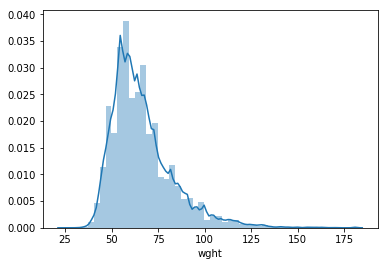

In [31]:
sns.distplot(weapon_carry['wght'])

In [32]:
weapon_carry['wght'] = np.log1p(weapon_carry['wght'])

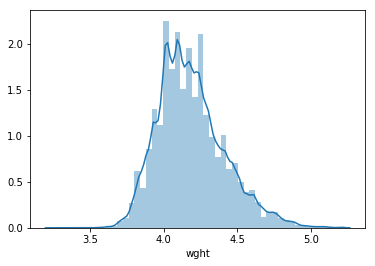

In [33]:
sns.distplot(weapon_carry['wght'])

In [34]:
weapon_carry.isnull().sum()

Gun_carry           0
oth_weapons         0
weight              0
Sex                 0
raceeth             0
age                 0
grade               0
suicide_consider    0
wght                0
sex_id              0
dtype: int64

In [35]:
### to csv
weapon_carry.to_csv('weapon_carry.csv', index = False)

# Q15:22 Other Violence and Demographics 

* Q15: During the past 30 days, on how many days did you not go to school because you felt you would be unsafe at school or on your way to or from school?

* Q16: During the past 12 months, how many times has someone threatened or injured you with a weapon such as a gun, knife, or club on school property?

* Q17: During the past 12 months, how many times were you in a physical fight?

* Q18: During the past 12 months, how many times were you in a physical fight on school property?

* Q19: Have you ever been physically forced to have sexual intercourse when you did not want to?

* Q20: During the past 12 months, how many times did anyone force you to do sexual things that you did not want to do? (Count such things as kissing, touching, or being physically forced to have sexual intercourse.)

* Q21: During the past 12 months, how many times did someone you were dating or going out with force you to do sexual things that you did not want to do? (Count such things as kissing, touching, or being physically forced to have sexual intercourse.)

* Q22: During the past 12 months, how many times did someone you were dating or going out with physically hurt you on purpose? (Count such things as being hit, slammed into something, or injured with an object

In [49]:
cdc_data['q15'].value_counts()

1.0    11324
2.0      461
3.0      233
5.0      100
4.0       53
Name: q15, dtype: int64

In [50]:
violence = pd.DataFrame(cdc_data[['q15', 'q16', 'q17', 'q18', 'q19', 'q20', 'q21', 'q22', 'weight']])
violence.head()

,q15,q16,q17,q18,q19,q20,q21,q22,weight
0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,0.5497
1,1.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,0.3811
2,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,0.4238
3,1.0,1.0,3.0,1.0,2.0,1.0,2.0,2.0,0.4238
4,1.0,1.0,3.0,3.0,2.0,1.0,2.0,2.0,0.5497


In [51]:
violence = pd.merge(violence, Demo, how='outer', on='weight')
violence.head()

,q15,q16,q17,q18,q19,q20,q21,q22,weight,Sex,raceeth,age,grade,suicide_consider,wght,sex_id
0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,0.5497,F,White,16 years old,11th grade,No,108.86,Heterosexual
1,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,0.5497,F,White,18 or older,11th grade,No,65.77,Heterosexual
2,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,0.5497,F,White,16 years old,11th grade,Yes,68.04,Heterosexual
3,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,0.5497,F,White,16 years old,11th grade,No,81.65,Heterosexual
4,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,0.5497,F,White,16 years old,11th grade,No,117.94,Heterosexual


In [52]:
violence['unsafe'] = violence['q15']
violence['inj_weapon_school'] = violence['q16']
violence['phys_fight'] = violence['q17']
violence['phys_fight_school'] = violence['q18']
violence['forced_sex'] = violence['q19']
violence['forced_sex_2'] = violence['q20']
violence['dating_viol'] = violence['q21']
violence['dating_viol_2'] = violence['q22']

violence.head()
violence.drop(['q15','q16','q17', 'q18', 'q19', 'q20', 'q21', 'q22'], axis = 1, inplace = True)

In [53]:
violence.head()

,weight,Sex,raceeth,age,grade,suicide_consider,wght,sex_id,unsafe,inj_weapon_school,phys_fight,phys_fight_school,forced_sex,forced_sex_2,dating_viol,dating_viol_2
0,0.5497,F,White,16 years old,11th grade,No,108.86,Heterosexual,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0
1,0.5497,F,White,18 or older,11th grade,No,65.77,Heterosexual,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0
2,0.5497,F,White,16 years old,11th grade,Yes,68.04,Heterosexual,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0
3,0.5497,F,White,16 years old,11th grade,No,81.65,Heterosexual,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0
4,0.5497,F,White,16 years old,11th grade,No,117.94,Heterosexual,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0


## Missing

In [54]:
total = violence.isna().sum()/violence.isna().count()
sum=violence.isna().sum()

missing=pd.concat([total,sum],axis=1,keys=['Perc','Sum']).sort_values(by='Perc',ascending=False)

colstodrop = missing[missing['Sum']>0].index

missing[missing['Sum']>0]

,Perc,Sum
phys_fight,0.444102,101651
unsafe,0.439471,100591
dating_viol,0.068089,15585
dating_viol_2,0.044930,10284
forced_sex_2,0.039984,9152
forced_sex,0.024475,5602
phys_fight_school,0.014155,3240
inj_weapon_school,0.004443,1017


In [67]:
violence.inj_weapon_school.value_counts()

1.0    214425
2.0      6736
3.0      3181
8.0      1841
4.0      1452
5.0       923
6.0       195
7.0       138
Name: inj_weapon_school, dtype: int64

## Imputaion

In [66]:
violence['dating_viol']=violence['dating_viol'].fillna(1.0)
print('Dating Violence unique Values: ', violence['dating_viol'].unique())

violence['dating_viol_2']=violence['dating_viol_2'].fillna(2.0)
print('Dating Violence 2 unique Values: ', violence['dating_viol_2'].unique())

violence['forced_sex_2']=violence['forced_sex_2'].fillna(1.0)
print('Forced sex unique Values: ', violence['forced_sex_2'].unique())

violence['forced_sex']=violence['forced_sex'].fillna(2.0)
print('Forced sex unique Values: ', violence['forced_sex'].unique())

violence['phys_fight_school']=violence['phys_fight_school'].fillna(1.0)
print('Phys fight unique Values: ', violence['phys_fight_school'].unique())

violence['inj_weapon_school']=violence['inj_weapon_school'].fillna(1.0)
print('INj with wep unique Values: ', violence['inj_weapon_school'].unique())


Dating Violence unique Values:  [1. 2. 6. 4. 3. 5.]
Dating Violence 2 unique Values:  [1. 2. 4. 3. 6. 5.]
Forced sex unique Values:  [1. 5. 3. 4. 2.]
Forced sex unique Values:  [2. 1.]
Phys fight unique Values:  [1. 3. 2. 4. 7. 5. 6. 8.]
INj with wep unique Values:  [1. 2. 5. 3. 4. 7. 8. 6.]


In [68]:
violence.isna().sum()

weight                    0
Sex                       0
raceeth                   0
age                       0
grade                     0
suicide_consider          0
wght                      0
sex_id                    0
unsafe               100591
inj_weapon_school         0
phys_fight           101651
phys_fight_school         0
forced_sex                0
forced_sex_2              0
dating_viol               0
dating_viol_2             0
dtype: int64

## Normality

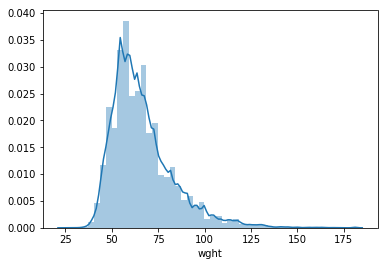

In [69]:
sns.distplot(violence['wght'])

In [70]:
violence['wght'] = np.log1p(violence['wght'])

In [71]:
violence.drop(['unsafe', 'phys_fight'], axis = 1, inplace = True)

In [73]:
violence.head()
violence.isna().sum()

weight               0
Sex                  0
raceeth              0
age                  0
grade                0
suicide_consider     0
wght                 0
sex_id               0
inj_weapon_school    0
phys_fight_school    0
forced_sex           0
forced_sex_2         0
dating_viol          0
dating_viol_2        0
dtype: int64

In [74]:
violence.to_csv('violence.csv', index = False)

# Q23, Q24 : Bullying

* Q23: During the past 12 months, have you ever been bullied on school property? 1.0 = Yes, 2.0 = No

* Q24: During the past 12 months, have you ever been electronically bullied? (Count being bullied through texting, Instagram, Facebook, or other social media.) 1.0 = Yes, 2.0 = No

In [77]:
bullied = pd.DataFrame(cdc_data[['q23', 'q24', 'weight']]) 

bullied = pd.merge(bullied, Demo, how='outer', on='weight')

In [78]:
bullied.head()

,q23,q24,weight,Sex,raceeth,age,grade,suicide_consider,wght,sex_id
0,2.0,2.0,0.5497,F,White,16 years old,11th grade,No,108.86,Heterosexual
1,2.0,2.0,0.5497,F,White,18 or older,11th grade,No,65.77,Heterosexual
2,2.0,2.0,0.5497,F,White,16 years old,11th grade,Yes,68.04,Heterosexual
3,2.0,2.0,0.5497,F,White,16 years old,11th grade,No,81.65,Heterosexual
4,2.0,2.0,0.5497,F,White,16 years old,11th grade,No,117.94,Heterosexual


In [80]:
bullied['bullied_school'] = bullied['q23']
bullied['bullied_electronic'] = bullied['q24']

In [81]:
bullied.columns

Index(['q23', 'q24', 'weight', 'Sex', 'raceeth', 'age', 'grade',
       'suicide_consider', 'wght', 'sex_id', 'bullied_school',
       'bullied_electronic'],
      dtype='object')

In [82]:
bullied.drop(['q23', 'q24'], axis = 1, inplace = True)

## Missing

In [84]:
total = bullied.isna().sum()/bullied.isna().count()
sum=bullied.isna().sum()

missing=pd.concat([total,sum],axis=1,keys=['Perc','Sum']).sort_values(by='Perc',ascending=False)

colstodrop = missing[missing['Sum']>0].index

missing[missing['Sum']>0]

,Perc,Sum
bullied_electronic,0.010857,2485
bullied_school,0.009917,2270


In [87]:
bullied.bullied_school.value_counts()

2.0    182746
1.0     43875
Name: bullied_school, dtype: int64

In [88]:
bullied['bullied_electronic']=bullied['bullied_electronic'].fillna(2.0)
print('Elec Bully unique Values: ', bullied['bullied_electronic'].unique())

bullied['bullied_school']=bullied['bullied_school'].fillna(2.0)
print('bullied_school unique Values: ', bullied['bullied_school'].unique())


Elec Bully unique Values:  [2. 1.]
bullied_school unique Values:  [2. 1.]


In [89]:
bullied.isna().sum()

weight                0
Sex                   0
raceeth               0
age                   0
grade                 0
suicide_consider      0
wght                  0
sex_id                0
bullied_school        0
bullied_electronic    0
dtype: int64

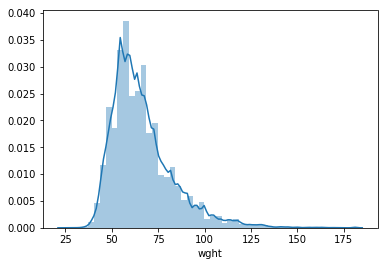

In [90]:
sns.distplot(bullied['wght'])

In [91]:
bullied['wght'] = np.log1p(bullied['wght'])

In [92]:
bullied.to_csv('bullied.csv', index = False)